### Summary 
    This notebook contains two part. 
    1. Hypothesis testing 
    2. EDA 

    Decisions and notes are mentioned whereever needed. 
    To know detailed approach, please read comments. 

In [1]:
## load the libraries for computation
import pandas as pd
import numpy as np

# Load the libraries for plotting
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# load the data 
df =pd.read_csv("step1_prepared_data.csv")
del df['Unnamed: 0'] # delete the noise
print("This is the shape of the data", df.shape)
df.head(1) 

This is the shape of the data (69402, 28)


,booking_to_delivery_date,unit_price_inK,type_of_sale,date_of_sale,mode_of_transport,no_of_units,cust_group_name,cust_segment_name,Customer_Id,delivery_month_from,...,plant_country_name,most_expensive_part_l1,most_expensive_part_l2,shipto_city,shipto_nr,soldto_city,soldto_nr,car_nr,shipto_country,soldto_country
0,long,1662.54,retail,2159-09-26,Truck,2640.0,aa,Prime,953.0-952.0,2160-04-01,...,Philippines,bonnet,bonner,Algeria,953,Algeria,952,Pag99992258,Algeria,Algeria


## EDA

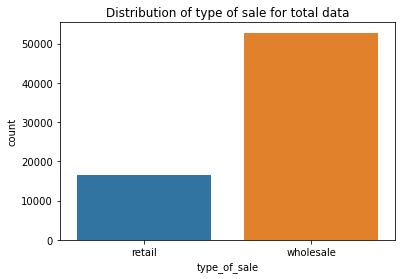

In [3]:
# Q. What is the distrution of wholesale Vs retail sales in the both segments 
plt.title("Distribution of type of sale for total data")
sns.countplot(df['type_of_sale'])
plt.show()

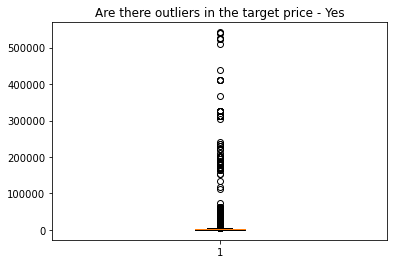

In [4]:
#### Q1. are there outliers in the target variable?
plt.title("Are there outliers in the target price - Yes")
plt.boxplot(df.unit_price_inK) # yes there are significant outliers 
plt.show()

In [6]:
df['unit_price_inK'].describe() # stats explains signifacnt outliers as well

count     69402.000000
mean       2552.617853
std       10480.989505
min           0.220000
25%         662.327094
50%        1387.540000
75%        2486.000000
max      542006.080000
Name: unit_price_inK, dtype: float64

#### Decision - 
       We shall handle the data in  segments and it will help in managing the outliers in the dataset based on price.
       

In [7]:
# unit price based segments
lower_segment = df[(df['unit_price_inK'] <= 5000)]
upper_segment = df[(df['unit_price_inK'] > 5000)]

print("Here is the dataset size for lower segment:", lower_segment.shape)
print("Here is the dataset size for outlier segment:", upper_segment.shape)
print("% of data outlier segment", (len(upper_segment)/ len(df) *100 ))

Here is the dataset size for lower segment: (62244, 28)
Here is the dataset size for outlier segment: (7158, 28)
% of data outlier segment 10.31382380911213


### Note
    Segmented cars can help in better feature correlation. This approach has outlier detection at unitPrice level, we could go with total reveue as well. Future work.

## Let us look how price varies with other features in the dataset

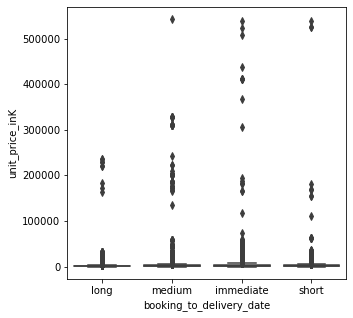

In [8]:
## is there a relation between price vs  booking_to_delivery_date' 
###  This explain how price varied 
var = 'booking_to_delivery_date'
data = pd.concat([df['unit_price_inK'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x=var, y="unit_price_inK", data=df)
plt.show()
# we can see that there are  outliers in each segment
# long book_to delievry date seems to fetch less money than immediate 

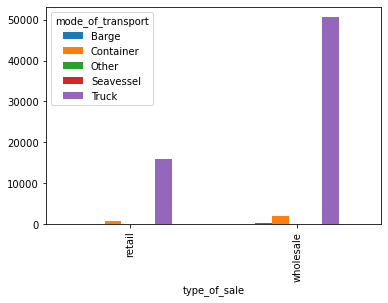

In [48]:

pd.crosstab(df['type_of_sale'],df['mode_of_transport']).plot.bar()
plt.show()

# we can see truck is the most used transporatation in both segement of retail and wholesale. 

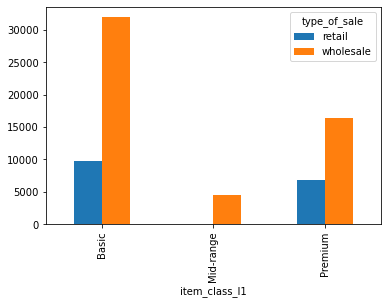

In [10]:
# let us look how item class l1 Vs type of sale look like
pd.crosstab(df['item_class_l1'],df['type_of_sale']).plot.bar()
plt.show()

# mid range does not contribute to reatil buyers

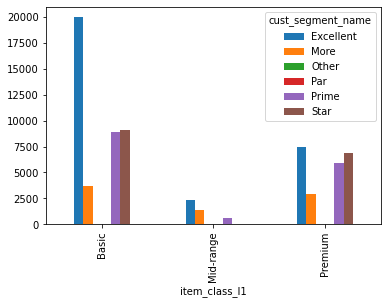

In [11]:
# let us look how item class l1 Vs cust_segment_name look like
pd.crosstab(df['item_class_l1'],df['cust_segment_name']).plot.bar()
plt.show()

# EXCELLERNT is more but distribution is maintianed except mid range

<AxesSubplot:xlabel='cust_segment_name', ylabel='unit_price_inK'>

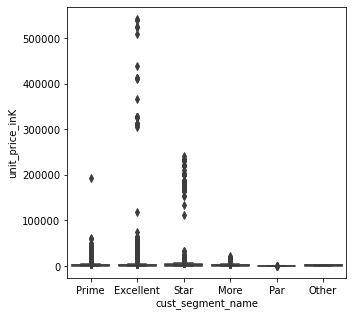

In [12]:
## is there a relation between price vs cust_segment_name
###  This explain how price varied
var = 'cust_segment_name'
data = pd.concat([df['unit_price_inK'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x=var, y="unit_price_inK", data=df)

# we can see that there are star and excellent customer tends to pay more for the units

<AxesSubplot:xlabel='unit_price_inK', ylabel='most_expensive_part_l2'>

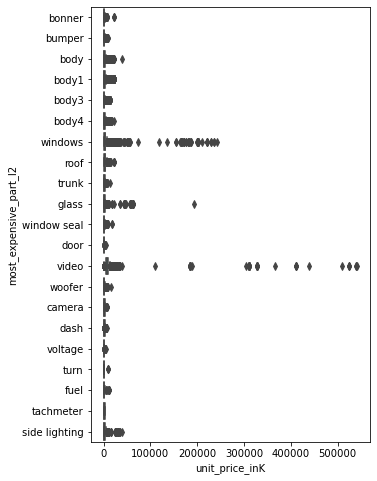

In [13]:
## is there a relation between price vs expensive parts 
###  This explain how price varied each year
var = 'most_expensive_part_l2'
data = pd.concat([df['unit_price_inK'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(5, 8))
sns.boxplot(y=var, x="unit_price_inK", data=df)

## video feature brings more money

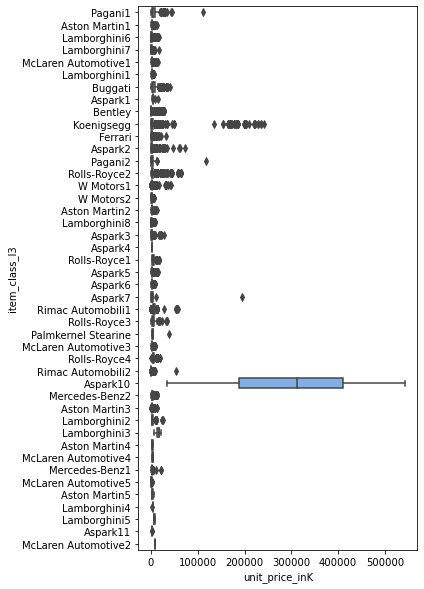

In [14]:
## is there a relation between price vs expensive parts 
###  This explain how price varied each year
var = 'item_class_l3'
data = pd.concat([df['unit_price_inK'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(5, 10))
sns.boxplot(y=var, x="unit_price_inK", data=df)
plt.show()

## this ASpark10, is the most well  priced but it sounds it will have impact on model later on

In [15]:
## Treat color columns 
## change the . with "Not_Defined" value
df['colour'] = df['colour'].replace('.' , "Not_Defined")

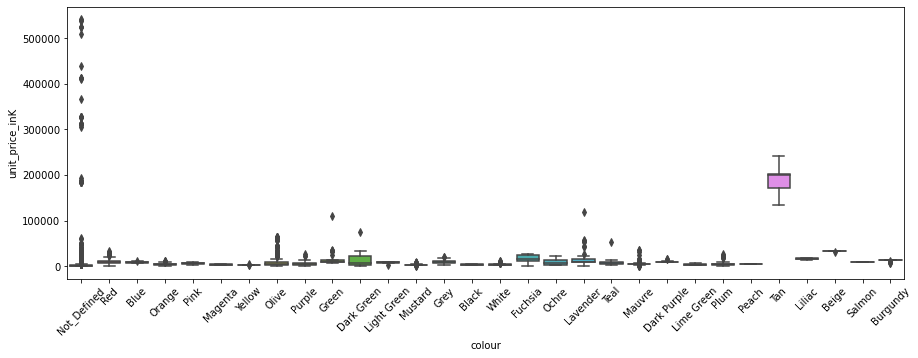

In [16]:
## is there a relation between price vs expensive parts 
###  This explain how price varied each year
var = 'colour'
data = pd.concat([df['unit_price_inK'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x=var, y="unit_price_inK", data=df)
plt.xticks(rotation=45)
plt.show()

# in general if car has a defined color it tends to get better price 

###
Q. is there any specific month when cars are sold with high prices ?

In [17]:
# prepare the date time data
df['year'] = pd.DatetimeIndex(df['date_of_sale']).year
df['month'] = pd.DatetimeIndex(df['date_of_sale']).month
df['day'] = pd.DatetimeIndex(df['date_of_sale']).day

<AxesSubplot:xlabel='month', ylabel='unit_price_inK'>

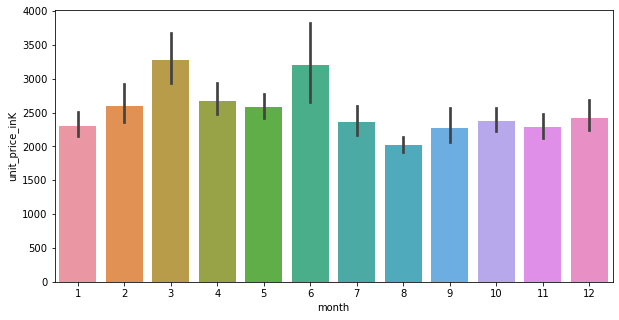

In [18]:
## is there any month which sees more sales 
###  This explain how price varied each year
var = 'month'
data = pd.concat([df['unit_price_inK'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=var, y="unit_price_inK", data=df)

### months does not have impact on sales 

### Note: 
While month seems to have not direct pattern,except first 2 quaters, Year has an impact, prices are going up on avg. 

<AxesSubplot:xlabel='year', ylabel='unit_price_inK'>

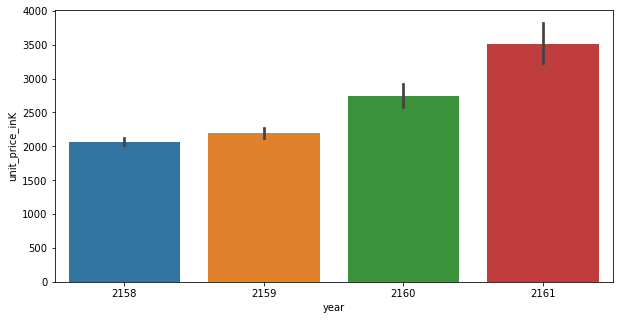

In [19]:
## is there any month which sees more sales 
###  This explain how price varied each year
var = 'year'
data = pd.concat([df['unit_price_inK'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=var, y="unit_price_inK", data=df)

## very important 
 # we see every year people are buying more high values - as we see more outliers


# Test the given hypothesis 

## Hypothesis 1

h0 = Latest transaction has greater role to play when deciding the pricing

In [20]:
# sort on date of sale 
# create column of datetimes (for sorting reverse-chronologically)
df["date_of_sale"] = pd.to_datetime(df.date_of_sale)

# group by name and convert dates into individual columns
grouped_df = df.sort_values("date_of_sale", ascending=False).groupby("Customer_Id")["unit_price_inK"].apply(list).apply(pd.Series).reset_index()

# truncate and rename columns
grouped_df = grouped_df[["Customer_Id", 0, 1]]
grouped_df.columns = ["Customer_Id", "most_recent", "second_most_recent"]
grouped_df.head(2)

,Customer_Id,most_recent,second_most_recent
0,2057.0-2057.0,2261.600000,2547.1600
1,2069.0-2069.0,3346.935174,3459.9664


In [21]:
## attach a label if most recent transction >>== second most recent 
grouped_df['label']  = np.where(grouped_df.most_recent >= grouped_df.second_most_recent, 1 , 0)
grouped_df.label.value_counts()

## most recent transaction is having a direct impact on the customer buying pattern , 
#it could be that if price was predicted less, we just used the latest price

1    454
0    287
Name: label, dtype: int64

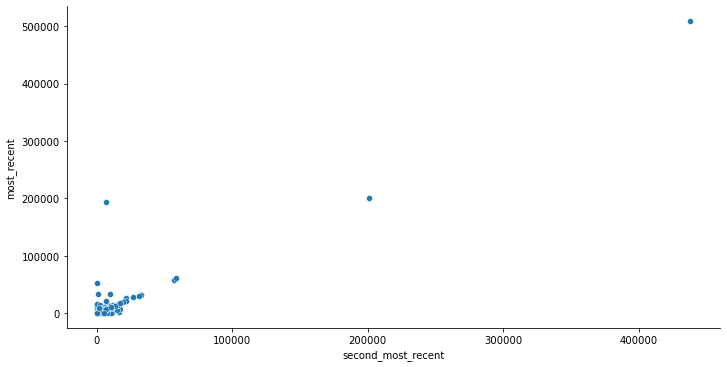

In [22]:
# Graphs to see if we have a direct relationshiop in the feature Good feature
sns.relplot(x="second_most_recent",y='most_recent',data=grouped_df, height=5, aspect=2)

# we can see that there is a signicant linear relationship between last price Vs most recent price
# outliers has problem here, we can see this data into segment based dataset

### Conclusion 
We have more cases where price was kept on the last price so we fail to reject the hypothesis here 
most recent unit price has significance 

# Hypothesis 2 

##  H0 
"Cars of different brand or class can be priced differently"

Cars of different types (as shown by item_class_l2 or item_class_l3- they are not sure which
one) could have different pricing structures. Though cars that have few units sold are priced in a
similar manner.

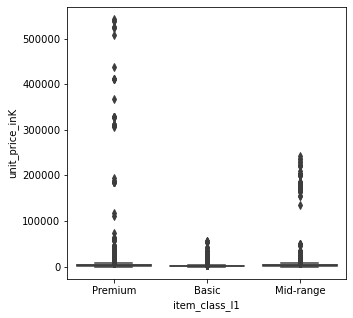

In [23]:
# visualize how item_class_l1 looks like
var = 'item_class_l1'
data = pd.concat([df['unit_price_inK'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= var, y="unit_price_inK", data=df, orient='v', ax=ax)
plt.show()

# basic class is certainly have some level of lower pricing excet certain outliers in this category


In [24]:
# filter the cars based in class 
print("Are there different brands solved under catogries?")
basic_class = df[df.item_class_l1  == 'Basic']
print("how many basic cars:", basic_class.shape)
mid_range_class = df[df.item_class_l1  == 'Mid-range']
print("how many mid range cars:", mid_range_class.shape)
preimum_class = df[df.item_class_l1  == 'Premium']
print("how many preimum cars:", preimum_class.shape)

Are there different brands solved under catogries?
how many basic cars: (41692, 31)
how many mid range cars: (4505, 31)
how many preimum cars: (23205, 31)


In [25]:
## do we have different brand in each category 
print("What is the distributrion of cars in basic class", basic_class.item_class_l2.value_counts())
print("............")

print("What is the distributrion of cars in mid-range class", mid_range_class.item_class_l2.value_counts())
print("............")

print("What is the distributrion of cars in premium class", preimum_class.item_class_l2.value_counts())

What is the distributrion of cars in basic class Bentley             14659
Lotus Cars          10721
Ferrari              7729
W Motors             6641
Rimac Automobili     1942
Name: item_class_l2, dtype: int64
............
What is the distributrion of cars in mid-range class Koenigsegg    4505
Name: item_class_l2, dtype: int64
............
What is the distributrion of cars in premium class Aspark                6704
Rolls-Royce           3796
Pagani                3630
Aston Martin          2705
Bugatti               1958
McLaren Automotive    1732
Mercedes-Benz         1463
Lamborghini           1217
Name: item_class_l2, dtype: int64


<AxesSubplot:xlabel='unit_price_inK'>

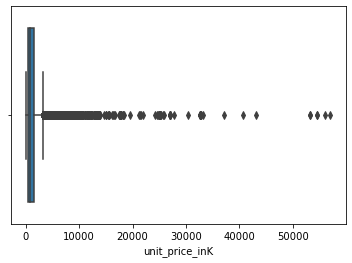

In [26]:
sns.boxplot(basic_class.unit_price_inK)

<AxesSubplot:xlabel='unit_price_inK'>

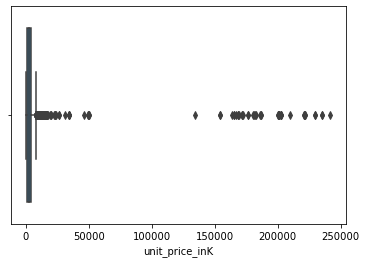

In [27]:
sns.boxplot(mid_range_class.unit_price_inK)  # preimum_class

<AxesSubplot:xlabel='unit_price_inK'>

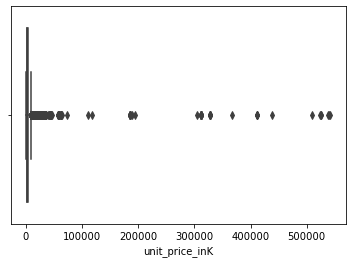

In [28]:
sns.boxplot(preimum_class.unit_price_inK)

This is the  basic class of brand type Vs price


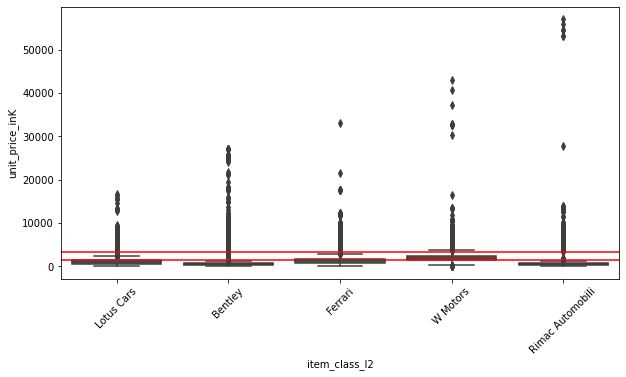

In [29]:
## pricing for each class 
## one more analysis
print("This is the  basic class of brand type Vs price")
var = 'item_class_l2'
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x= var, y="unit_price_inK", data=basic_class, orient='v')
plt.axhline(y=3400, color='r', linestyle='-')
plt.axhline(y=1400, color='r', linestyle='-')
plt.xticks(rotation=45)
plt.show()

This is the  mid range class of brand type Vs price


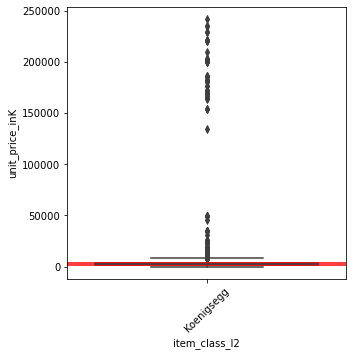

In [30]:
## pricing for each class 
## one more analysis
print("This is the  mid range class of brand type Vs price")
var = 'item_class_l2'
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= var, y="unit_price_inK", data= mid_range_class, orient='v')
plt.axhline(y=3400, color='r', linestyle='-')
plt.axhline(y=1400, color='r', linestyle='-')
plt.xticks(rotation=45)
plt.show()

This is the  preimum range class of brand type Vs price


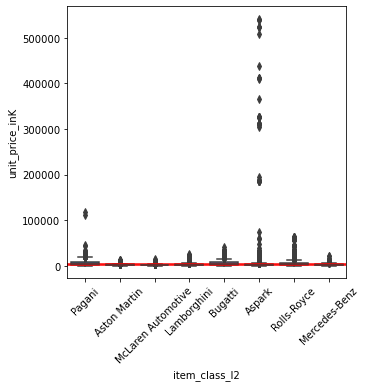

In [31]:
## pricing for each class 
## one more analysis
print("This is the  preimum range class of brand type Vs price")
var = 'item_class_l2'
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= var, y="unit_price_inK", data= preimum_class, orient='v')
plt.axhline(y=3400, color='r', linestyle='-')
plt.axhline(y=1400, color='r', linestyle='-')
plt.xticks(rotation=45)
plt.show()

### Conclusion 
 We have a clear segregation of the dataset based on two items only - brands are tagged as per classes. 
 
 item_class_l1 has a direct impact on pricing as it is about diffrenet brands itself.
 

## Understanding/decision
Classes have a good segmentation on type of the car. but we still have data quality issue with price
We need to test and try 2 approahces
 1. Approach1 - Divide dataset based on the item_class_l1 and treat each class prediction differently. This will be good if we want to build rule based clustering systems. 
 2. Approach 2 - Divide dataset based on price segments, we can have 2 segments - Lower and upper and let model build a relationship   
 
 I will be moving forward with Approach 2 now. 

## Hypothesis 3 
H0 - Pricing differs depending on size of customer (i.e size of their past purchases in terms of volume
or total spend- they are not sure which one)

## 
    h0 = Total past revenue and number of trasnactios influnces the prices 

    Pricing differs depending on size of customer (i.e size of their past purchases in terms of volume or total spend- they are not sure which one)

In [32]:
## sort our dataframe based on sale date
df_total = df.sort_values(by="date_of_sale", ascending= False)

df_total = df_total.dropna(axis=0) # drop null if any 

In [33]:
# derive the time columns
df_total['year'] = pd.DatetimeIndex(df_total['date_of_sale']).year
df_total['month'] = pd.DatetimeIndex(df_total['date_of_sale']).month
df_total['day'] = pd.DatetimeIndex(df_total['date_of_sale']).day

In [35]:
# Calculate the total revenue by multiplying unit_price_inK * no_of_units
df_total['revenue']  = df_total['unit_price_inK'] * df_total['no_of_units']

# create another dataframe where we have total money spend  by each customer 
# and number of transactions 
total_revenue = df_total.groupby("Customer_Id").agg({'revenue' :["sum",
                                               "count"]})

print("How many entries we have for cutsomers", total_revenue.shape[0])

total_revenue = total_revenue.reset_index() # let us reset the index for customer_id

total_revenue.columns  = ['Customer_Id', 'total_revenue', 'transaction_count'] ## rename the columns

total_revenue.head(2)

How many entries we have for cutsomers 741


,Customer_Id,total_revenue,transaction_count
0,2057.0-2057.0,2.245017e+07,15
1,2069.0-2069.0,1.870717e+07,35


<AxesSubplot:xlabel='year', ylabel='revenue'>

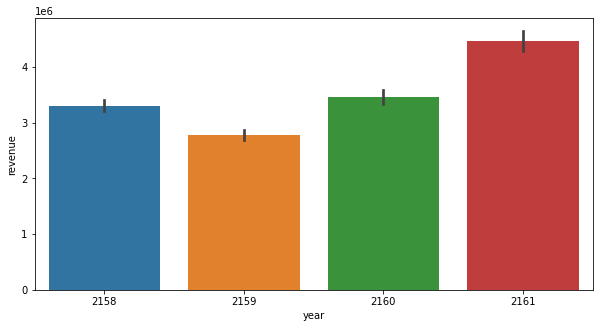

In [36]:
## is there any month which sees more sales 
###  This explain how price varied each year
var = 'year'
data = pd.concat([df_total['revenue'], df_total[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=var, y="revenue", data=df_total)

## very important 
 # Total revenue was down in 2nd and 3rd year

<AxesSubplot:xlabel='month', ylabel='revenue'>

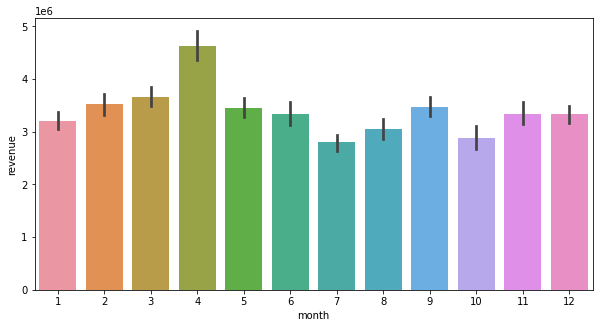

In [37]:
## is there any month which sees more sales 
###  This explain how price varied each year
var = 'month'
data = pd.concat([df_total['revenue'], df_total[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=var, y="revenue", data=df_total)

## Note
 # Qualtery signigicant pattern is observed expect the . Starting of quater it is less and then gradually it improves


In [38]:
# convert both of the datatype to string

## just a matter of caution - convert to same data type for join
total_revenue['Customer_Id'] = total_revenue['Customer_Id'].astype(str)
grouped_df['Customer_Id'] = grouped_df['Customer_Id'].astype(str) # this is coming from 1st hypothesis

In [39]:
print("WHat is the final shape for the total_revenue dataframe", total_revenue.shape)
print("WHat is the final shape for the most recent and second recent price dataframe", grouped_df.shape)

WHat is the final shape for the total_revenue dataframe (741, 3)
WHat is the final shape for the most recent and second recent price dataframe (741, 4)


In [40]:
# let us if totale revenue per customer has influnce latest unit price 
final_df =  grouped_df.merge(total_revenue, on='Customer_Id', how = 'inner')

In [41]:
final_df.shape

(741, 6)

In [42]:
final_df['transaction_count'].describe() # we do have outliers in transaction as well

count     741.000000
mean       93.659919
std       356.060810
min         1.000000
25%         4.000000
50%        23.000000
75%        71.000000
max      6167.000000
Name: transaction_count, dtype: float64

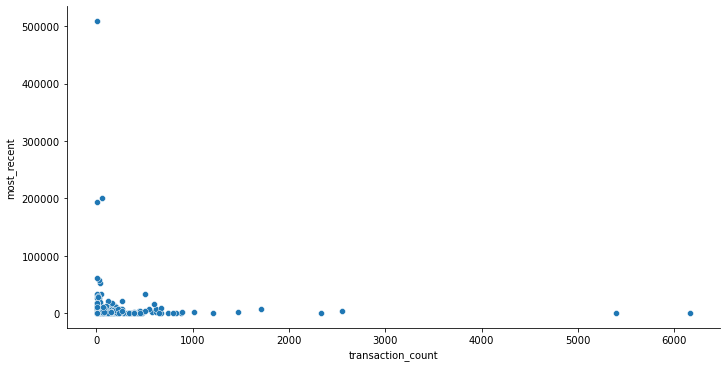

In [43]:
# Graphs depict more the total transaction vs the sell prices - Good feature
sns.relplot(x="transaction_count",y='most_recent',data=final_df, height=5,aspect=2)

# even we have high number of transaction , the price does not go really high/up

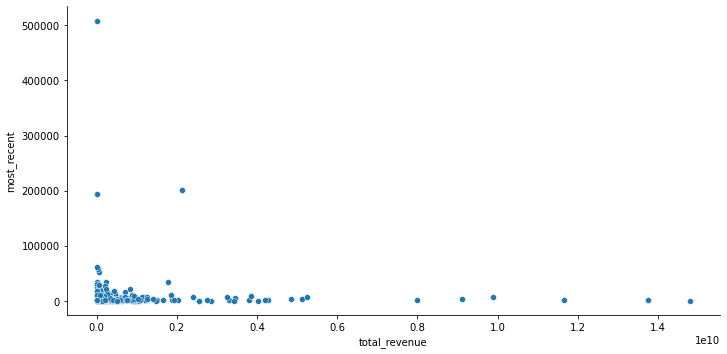

In [44]:
# Graphs depict more the KMs less the sell prices - Good feature
sns.relplot(x="total_revenue",y='most_recent',data=final_df,height=5,aspect=2)

# this could be happening due to outliers

### Note
We are not able to get the proper graphs due to outiers so,we will put some limits here

In [45]:
# exclude outliers 
final1 = final_df[final_df.transaction_count < 300]

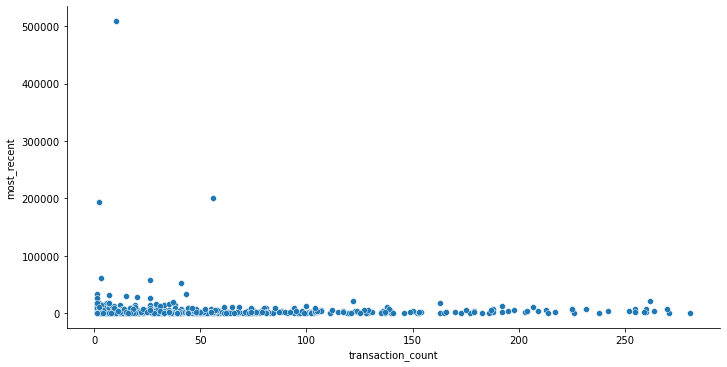

In [46]:
# Graphs depict  no direct relation
sns.relplot(x="transaction_count",y='most_recent',data=final1,height=5,aspect=2)

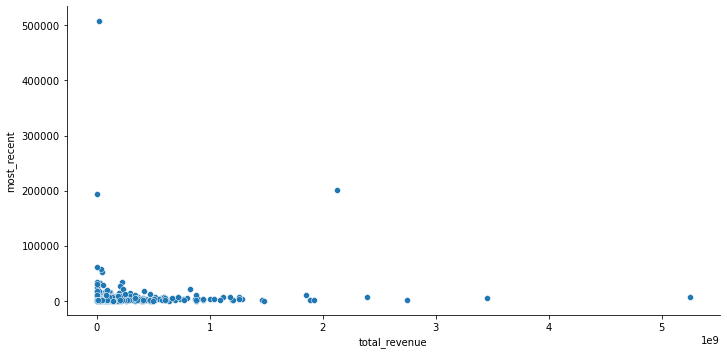

In [47]:
# Graphs depict  - no direct relation
sns.relplot(x="total_revenue",y='most_recent',data=final1,height=5,aspect=2)

# Next Steps

    Recommendations:
    - We shall divide the customer segments based on price outliers  for analysis
    - Add second recent transaction and an input  - Will be added to model
    - Handle the data for car class for model development  - Future work

    Next step - Model development